In [3]:
import csv
import pandas as pd

import plotly
import pyecharts
import matplotlib

import seaborn as sns

from pyecharts import Bar
from pyecharts import Line
from wordcloud import WordCloud

from matplotlib import pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pyecharts'

In [ ]:
df_tw = pd.read_csv('results_taiwan.csv',encoding = 'gbk')
df_hk = pd.read_csv('results_Hong Kong.csv',encoding = 'gbk')
df_ml = pd.read_csv('results_mainland.csv',encoding = 'gbk')

In [ ]:
df_ml

In [5]:
def find_styles(df):
    styles = []
    for i in df['类型'].fillna(''):
        style = i.strip().split(' / ')
        for j in style:
            styles.append(j)
    tmp = pd.DataFrame({'styles': styles})
    tmp = tmp[tmp['styles'] != '']
    style_counts = tmp['styles'].value_counts()
    style = pd.DataFrame(style_counts)
    return style

In [6]:
styles_tw = find_styles(df_tw)
styles_hk = find_styles(df_hk)
styles_ml = find_styles(df_ml)

In [10]:
styles_hk

,styles
剧情,566
爱情,263
喜剧,188
古装,164
武侠,100
犯罪,90
动作,89
悬疑,70
家庭,59
历史,42


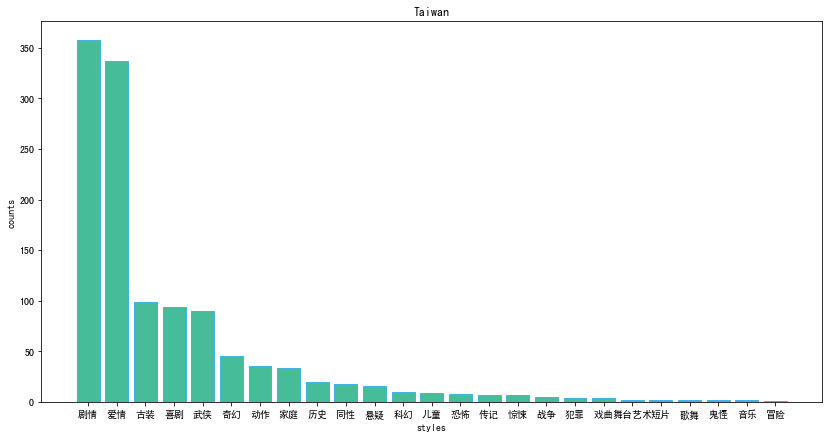

In [340]:
fig = plt.figure(figsize=(14,7)) 
plt.bar(styles_tw.index, styles_tw.styles,color = '#46bc99',edgecolor = '#40b4e5') #change color of the bars
plt.title('Taiwan') #plot title and label name
plt.xlabel('styles')
plt.ylabel('counts')
plt.show()

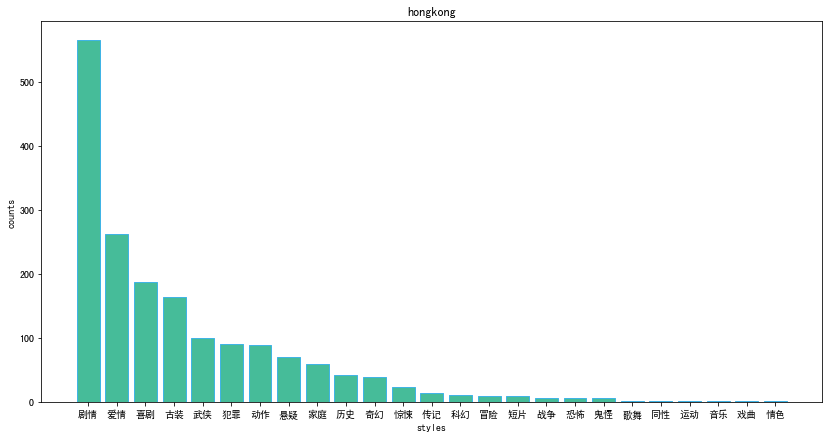

In [341]:
fig = plt.figure(figsize=(14,7)) 
plt.bar(styles_hk.index, styles_hk.styles,color = '#46bc99',edgecolor = '#40b4e5') #change color of the bars
plt.title('hongkong') #plot title and label name
plt.xlabel('styles')
plt.ylabel('counts')
plt.show()

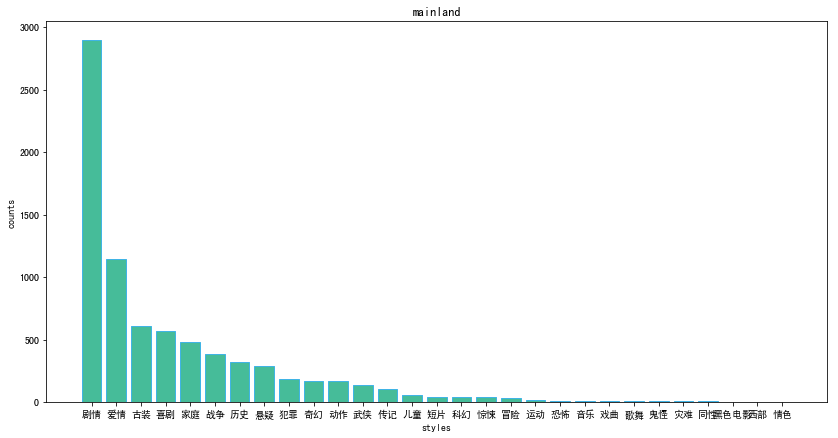

In [342]:
fig = plt.figure(figsize=(14,7)) 
plt.bar(styles_ml.index, styles_ml.styles,color = '#46bc99',edgecolor = '#40b4e5') #change color of the bars
plt.title('mainland') #plot title and label name
plt.xlabel('styles')
plt.ylabel('counts')
plt.show()

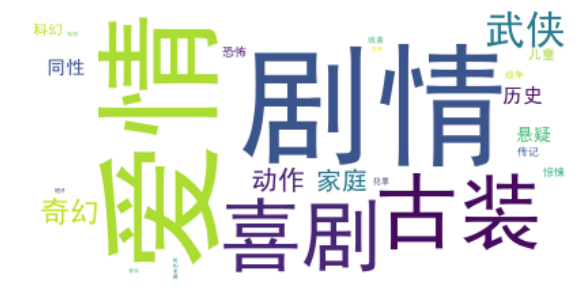

In [166]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
x = tmp['styles'].value_counts()
wc = WordCloud(background_color = 'white', font_path = 'SimHei.ttf', max_words = 1000, max_font_size = 100, random_state = 20) #msyh
wc.generate_from_frequencies(x)
plt.figure(figsize=(15, 5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [409]:
df_tw['主演'] = df_tw['主演'].apply(str)

In [416]:
fss = []
for i in range(740):
    fs = (df_tw['主演'][i].split(' / '), df_tw['豆瓣评分'][i])
    rw = []
    counter = 0
    for f in fs[0]:
        counter += 1
        rw.append((f,fs[1]))
        if counter == 4:
            break
    fss += rw

names = {}
for fs in fss:
    if names.get(fs[0]) == None:
        names[fs[0]] = [fs[1], 1]
    else:
        names[fs[0]][0] += fs[1]
        names[fs[0]][1] += 1
        
for value in names.values():
    value[0] = round(value[0] / value[1], 2)
    
pop_name_list = []
for item in names.items():
    if item[1][1] < 3: 
        pop_name_list.append(item[0])
        
for name in pop_name_list:
    names.pop(name)
    
yypm = sorted(names.items(), key=lambda d:d[1], reverse = True) 

ac_score = []
ac_freq = []
ac_name = []

for y in yypm:
    ac_score.append(y[1][0])
    ac_freq.append(y[1][1])
    
for y in yypm:
    ac_name.append(y[0])
    
mydata_tw = pd.DataFrame({'演员':ac_name,
                      '平均分':ac_score,
                      '部数':ac_freq})

In [427]:
actors_tw = mydata_tw.drop(mydata_tw.index[[1,8]])#去除黄泽文口白和空白（nan）

In [428]:
actors_tw

,演员,平均分,部数
0,黄健玮,8.63,3
2,萧淑慎,8.50,3
3,龙劭华,8.40,3
4,周幼婷,8.23,3
5,柯淑勤,8.22,4
6,连俞涵,8.20,3
7,黄文择,8.18,6
9,马志翔,8.13,3
10,苏明明,8.10,3
11,沈孟生,8.00,4


In [419]:
df_hk['主演'] = df_hk['主演'].apply(str)

fss = []
for i in range(1036):
    fs = (df_hk['主演'][i].split(' / '), df_hk['豆瓣评分'][i])
    rw = []
    counter = 0
    for f in fs[0]:
        counter += 1
        rw.append((f,fs[1]))
        if counter == 4:
            break
    fss += rw

names = {}
for fs in fss:
    if names.get(fs[0]) == None:
        names[fs[0]] = [fs[1], 1]
    else:
        names[fs[0]][0] += fs[1]
        names[fs[0]][1] += 1
        
for value in names.values():
    value[0] = round(value[0] / value[1], 2)
    
pop_name_list = []
for item in names.items():
    if item[1][1] < 3: 
        pop_name_list.append(item[0])
        
for name in pop_name_list:
    names.pop(name)
    
yypm = sorted(names.items(), key=lambda d:d[1], reverse = True) 

ac_score = []
ac_freq = []
ac_name = []

for y in yypm:
    ac_score.append(y[1][0])
    ac_freq.append(y[1][1])
    
for y in yypm:
    ac_name.append(y[0])
    
mydata_hk = pd.DataFrame({'演员':ac_name,
                      '平均分':ac_score,
                      '部数':ac_freq})

In [420]:
mydata_hk

,演员,平均分,部数
0,钟汉良,8.53,3
1,李若彤,8.47,3
2,周家怡,8.40,3
3,王宗尧,8.30,3
4,岳华,8.25,6
5,潘灿良,8.23,3
6,张国荣,8.10,13
7,林志豪,8.10,3
8,杨淇,8.07,4
9,徐锦江,8.07,3


In [421]:
df_ml['主演'] = df_ml['主演'].apply(str)

fss = []
for i in range(4489):
    fs = (df_ml['主演'][i].split(' / '), df_ml['豆瓣评分'][i])
    rw = []
    counter = 0
    for f in fs[0]:
        counter += 1
        rw.append((f,fs[1]))
        if counter == 4:
            break
    fss += rw

names = {}
for fs in fss:
    if names.get(fs[0]) == None:
        names[fs[0]] = [fs[1], 1]
    else:
        names[fs[0]][0] += fs[1]
        names[fs[0]][1] += 1
        
for value in names.values():
    value[0] = round(value[0] / value[1], 2)
    
pop_name_list = []
for item in names.items():
    if item[1][1] < 3: 
        pop_name_list.append(item[0])
        
for name in pop_name_list:
    names.pop(name)
    
yypm = sorted(names.items(), key=lambda d:d[1], reverse = True) 

ac_score = []
ac_freq = []
ac_name = []

for y in yypm:
    ac_score.append(y[1][0])
    ac_freq.append(y[1][1])
    
for y in yypm:
    ac_name.append(y[0])
    
mydata_ml = pd.DataFrame({'演员':ac_name,
                      '平均分':ac_score,
                      '部数':ac_freq})

In [470]:
mydata_ml

,演员,平均分,部数
0,孟霞,8.93,3
1,刘子枫,8.88,5
2,庞祖云,8.86,5
3,游本昌,8.73,3
4,文兴宇,8.73,3
5,吕启凤,8.73,3
6,孙彦军,8.70,3
7,朱旭,8.55,6
8,刘汗,8.53,3
9,王全有,8.43,3


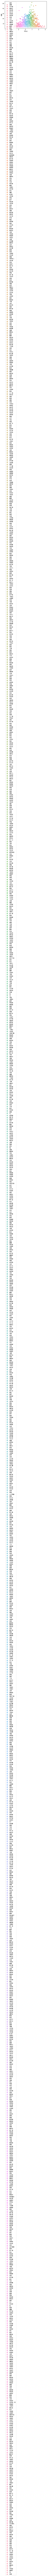

In [471]:

axes = sns.scatterplot(x = '平均分', y = '部数', hue = '演员', data = mydata_ml)

In [463]:
yy = actors_tw.sort_values(by = '部数', ascending = False).head(10)
yy

,演员,平均分,部数
155,蓝正龙,6.82,18
72,马景涛,7.24,18
130,刘雪华,6.94,17
73,焦恩俊,7.24,16
156,李威,6.82,16
67,张晨光,7.27,15
193,杨丞琳,6.57,15
162,杨谨华,6.79,14
197,陈怡蓉,6.55,14
28,吴慷仁,7.68,14


In [464]:
yy_hk = mydata_hk.sort_values(by = '部数', ascending = False).head(10)
yy_hk

,演员,平均分,部数
216,郭晋安,7.06,45
193,欧阳震华,7.18,44
190,宣萱,7.19,38
235,黎耀祥,6.99,37
219,佘诗曼,7.03,35
129,刘松仁,7.40,34
277,杨怡,6.77,32
269,黄宗泽,6.82,32
273,陈豪,6.79,32
304,马国明,6.50,29


In [465]:
yy_ml = mydata_ml.sort_values(by = '部数', ascending = False).head(10)
yy_ml

,演员,平均分,部数
405,张国立,6.99,52
465,唐国强,6.89,47
125,陈宝国,7.58,46
261,张嘉译,7.24,45
597,刘涛,6.69,43
1194,于震,5.54,42
474,斯琴高娃,6.87,38
314,刘威,7.15,38
298,李幼斌,7.18,38
601,李小冉,6.68,37


In [466]:
yy = pd.concat([yy,yy_hk])
yy = pd.concat([yy,yy_ml])
allyy = yy.sort_values(by = '部数',ascending = False)
allyy

,演员,平均分,部数
405,张国立,6.99,52
465,唐国强,6.89,47
125,陈宝国,7.58,46
261,张嘉译,7.24,45
216,郭晋安,7.06,45
193,欧阳震华,7.18,44
597,刘涛,6.69,43
1194,于震,5.54,42
298,李幼斌,7.18,38
314,刘威,7.15,38


In [1]:
attr = allyy .演员
# v1 = allyy .平均分
v2 = allyy .部数
bar = Bar("港澳台劳模")
# bar.add("平均分", attr, v1,[str(y) for y in allyy.演员], mark_line = ["average"], label_color = ['#FFDAB9'])
bar.add("部数", attr, v2, mark_line = ["average"], label_color = ['#46bc99'])


bar

NameError: name 'allyy' is not defined

In [468]:
attr = allyy .演员
v1 = allyy .平均分
# v2 = allyy .部数
bar = Bar("港澳台劳模劳模")
bar.add("平均分", attr, v1,[str(y) for y in allyy.演员], mark_line = ["average"], label_color = ['#FFDAB9'])
# bar.add("部数", attr, v2, mark_line = ["average"], label_color = ['#46bc99'])


bar

In [469]:
weibofans = {'谢娜':117150000,'','','',}

SyntaxError: invalid syntax (<ipython-input-469-507fb148d87a>, line 1)

In [204]:
top15 = actors.head(15)

In [205]:
bottom15 = actors.tail(15)

In [207]:
bottom15

,演员,平均分,部数
531,王心凌,5.77,6
532,陶传正,5.77,3
533,博焱,5.70,4
534,阿本,5.68,5
535,魏蔓,5.65,8
536,许孟哲,5.60,4
537,黄伟晋,5.60,3
538,黄勐,5.57,3
539,陈奕,5.52,4
540,林子闳,5.48,4


In [407]:
attr = top15.演员
v1 = top15.平均分
v2 = top15.部数
bar = Bar("台湾演员平均分top15")
bar.add("平均分", attr, v1,[str(y) for y in top15.演员], mark_line = ["average"], label_color = ['#FFDAB9'])
bar.add("部数", attr, v2, mark_line = ["average"], label_color = ['#46bc99'])


bar

In [459]:
attr = bottom15.演员
v1 = bottom15.平均分
v2 = bottom15.部数
bar = Bar("bottom15台湾演员平均分")
bar.add("平均分", attr, v1, mark_line = ["average"], label_color = ['#FFDAB9'])
bar.add("部数", attr, v2, mark_line = ["average"], label_color = ['#46bc99'])

bar#.render('chart.html')

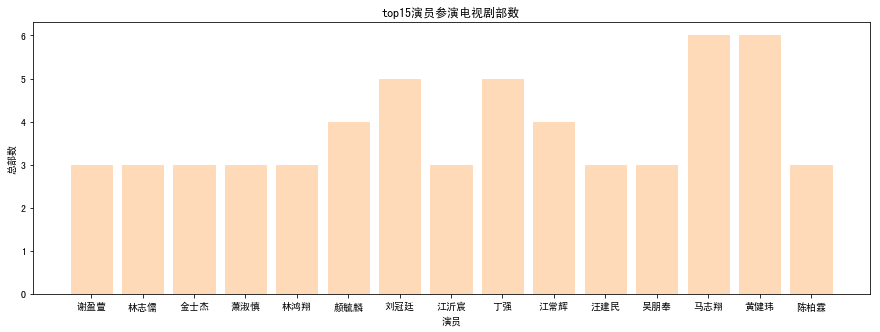

In [209]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(15,5)) 
plt.bar(top15['演员'], top15['部数'], color = '#FFDAB9', edgecolor = '#FFDAB9') 

plt.title('top15演员参演电视剧部数')
plt.xlabel('演员')
plt.ylabel('总部数')
plt.show()

In [200]:
bs = actors.sort_values(by = '部数',ascending = False)

In [206]:
bs

,演员,平均分,部数
332,刘雪华,6.85,21
256,蓝正龙,7.04,21
188,马景涛,7.20,19
170,张晨光,7.26,19
178,孙兴,7.23,19
294,修杰楷,6.96,18
272,杨谨华,7.02,18
171,焦恩俊,7.25,17
307,李威,6.91,17
70,吴慷仁,7.69,17
